<a href="https://colab.research.google.com/github/Junejee/Credit-Score-Classification-Based-on-Supervised-Machine-Learning-/blob/main/Credit_Score_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import re

In [ ]:
df = pd.read_csv('Credit_Score_Train.csv')    #Load data train / test dataset
test = pd.read_csv('Credit_Score_Test.csv')

In [ ]:
df['Credit_Score'].value_counts()

Credit_Score
Standard    26411
Poor        14709
Good         8879
Name: count, dtype: int64

In [ ]:
df.shape

(49999, 28)

In [ ]:
df.columns


Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [ ]:
#Drop the column which is out of model scope
d_col = ['ID','Customer_ID','Month','Name','SSN','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card',
         'Interest_Rate','Num_of_Loan','Type_of_Loan','Changed_Credit_Limit','Num_Credit_Inquiries','Credit_Mix',
         'Credit_Utilization_Ratio','Amount_invested_monthly']
drop_df = df.drop(d_col , axis=1).copy()
drop_df

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,7,809.98,22 Years and 1 Months,No,49.574949,High_spent_Small_value_payments,312.4940887,Good
1,23,Scientist,19114.12,-1,NaN,809.98,NaN,No,49.574949,Low_spent_Large_value_payments,284.6291625,Good
2,-500,Scientist,19114.12,3,7,809.98,22 Years and 3 Months,No,49.574949,Low_spent_Medium_value_payments,331.2098629,Good
3,23,Scientist,19114.12,5,4,809.98,22 Years and 4 Months,No,49.574949,Low_spent_Small_value_payments,223.4513097,Good
4,23,Scientist,19114.12,6,NaN,809.98,22 Years and 5 Months,No,49.574949,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
49994,17,Developer,35662.88,19,13,2391.98,18 Years and 9 Months,Yes,60.787744,Low_spent_Small_value_payments,191.6808075,Standard
49995,17,Developer,35662.88_,19,14,2391.98,18 Years and 10 Months,Yes,60.787744,Low_spent_Small_value_payments,180.6919431,Poor
49996,17,Developer,35662.88,19,16,2391.98,18 Years and 11 Months,Yes,60.787744,High_spent_Medium_value_payments,357.56701,Poor
49997,18,_______,35662.88,15,14,2391.98,19 Years and 0 Months,Yes,60.787744,Low_spent_Medium_value_payments,401.2391219,Poor


In [ ]:
#Explore the NAN value in the dataset
drop_df.isnull().sum()

Age                          0
Occupation                   0
Annual_Income                0
Delay_from_due_date          0
Num_of_Delayed_Payment    3470
Outstanding_Debt             0
Credit_History_Age        4549
Payment_of_Min_Amount        0
Total_EMI_per_month          0
Payment_Behaviour            0
Monthly_Balance            631
Credit_Score                 0
dtype: int64

In [ ]:
drop_na = drop_df.dropna().copy()

In [ ]:
drop_na.head(10)

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,7,809.98,22 Years and 1 Months,No,49.574949,High_spent_Small_value_payments,312.4940887,Good
2,-500,Scientist,19114.12,3,7,809.98,22 Years and 3 Months,No,49.574949,Low_spent_Medium_value_payments,331.2098629,Good
3,23,Scientist,19114.12,5,4,809.98,22 Years and 4 Months,No,49.574949,Low_spent_Small_value_payments,223.4513097,Good
5,23,Scientist,19114.12,8,4,809.98,22 Years and 6 Months,No,49.574949,!@9#%8,340.4792118,Good
6,23,Scientist,19114.12,3,8_,809.98,22 Years and 7 Months,No,49.574949,Low_spent_Small_value_payments,244.5653167,Good
8,28_,_______,34847.84,3,4,605.03,26 Years and 7 Months,No,18.816215,Low_spent_Small_value_payments,470.6906269,Standard
9,28,Teacher,34847.84,7,1,605.03,26 Years and 8 Months,No,18.816215,High_spent_Large_value_payments,484.5912143,Good
10,28,Teacher,34847.84_,3,-1,605.03,26 Years and 9 Months,No,18.816215,High_spent_Large_value_payments,466.4664764,Standard
11,28,Teacher,34847.84,3,3_,605.03,26 Years and 10 Months,No,18.816215,Low_spent_Medium_value_payments,465.6762241,Good
12,28,Teacher,34847.84,3,1,605.03,26 Years and 11 Months,No,18.816215,Low_spent_Small_value_payments,444.8670319,Good


In [ ]:
for i in drop_na:
  print('\n',i,drop_na[i].unique())


 Age ['23' '-500' '28_' '28' '34' '54' '55' '21' '31' '33' '34_' '30' '30_'
 '24' '24_' '44' '45' '40' '32' '33_' '35' '35_' '36' '39' '37' '181' '20'
 '46' '26' '41' '42' '19' '31_' '48' '995' '40_' '37_' '38' '54_' '5079'
 '43' '21_' '22' '16' '7080' '18' '3885' '15' '27' '25' '3052' '14' '5342'
 '17' '18_' '4431' '2657' '2111_' '46_' '47' '1032' '16_' '19_' '456'
 '5717' '53_' '53' '56' '25_' '38_' '27_' '55_' '3169' '1191' '29' '43_'
 '48_' '49' '49_' '6955' '2534' '3115' '7657' '51' '50' '5112' '50_' '32_'
 '6452' '2744' '22_' '1439' '5795' '20_' '4872' '1772' '15_' '1383' '5657'
 '52' '1934' '51_' '8352' '3734' '26_' '2056' '2339' '14_' '8406' '39_'
 '36_' '6953' '5626' '4471' '548' '44_' '769' '5490' '525' '4202' '3665'
 '7670_' '4670' '3616' '6922' '42_' '6619' '1808' '7992' '45_' '223'
 '1232' '4659' '6895' '395' '7099' '6048' '3936' '3512' '123' '5639' '471'
 '7359' '29_' '23_' '4049' '5053' '2109' '7183' '5604' '1206' '6835'
 '4067' '41_' '1170' '3625' '6354' '3724' '5610' 

In [ ]:
drop_na = drop_na[drop_na['Occupation'].str.contains('_______') == False]
drop_na = drop_na[drop_na['Payment_Behaviour'].str.contains('!@9#%8') == False]

In [ ]:
sym = "\\`*_{}[]()>#@+!$:;"
col_int = ['Age','Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt',
           'Total_EMI_per_month','Monthly_Balance','Annual_Income']
col_str = ['Occupation','Credit_History_Age','Payment_of_Min_Amount','Credit_Score']
for i in col_int:
  for c in sym:
    drop_na[i] = drop_na[i].astype(str).str.replace(c,'')
for i in col_str:
  for c in sym:
    drop_na[i] = drop_na[i].replace(c,'')
drop_na.head()

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,7,809.98,22 Years and 1 Months,No,49.57494921,High_spent_Small_value_payments,312.4940887,Good
2,-500,Scientist,19114.12,3,7,809.98,22 Years and 3 Months,No,49.57494921,Low_spent_Medium_value_payments,331.2098629,Good
3,23,Scientist,19114.12,5,4,809.98,22 Years and 4 Months,No,49.57494921,Low_spent_Small_value_payments,223.4513097,Good
6,23,Scientist,19114.12,3,8,809.98,22 Years and 7 Months,No,49.57494921,Low_spent_Small_value_payments,244.5653167,Good
9,28,Teacher,34847.84,7,1,605.03,26 Years and 8 Months,No,18.81621457,High_spent_Large_value_payments,484.5912143,Good


In [ ]:
drop_na['Credit_History_Age'] = drop_na['Credit_History_Age'].astype(str).str.replace(' Years and ','.')
drop_na['Credit_History_Age'] = drop_na['Credit_History_Age'].astype(str).str.replace('Months','')

In [ ]:
drop_na['Payment_Behaviour'] = drop_na['Payment_Behaviour'].astype(str).str.replace('Low_spent_Small_value_payments','1')
drop_na['Payment_Behaviour'] = drop_na['Payment_Behaviour'].astype(str).str.replace('Low_spent_Medium_value_payments','2')
drop_na['Payment_Behaviour'] = drop_na['Payment_Behaviour'].astype(str).str.replace('Low_spent_Large_value_payments','3')
drop_na['Payment_Behaviour'] = drop_na['Payment_Behaviour'].astype(str).str.replace('High_spent_Small_value_payments','4')
drop_na['Payment_Behaviour'] = drop_na['Payment_Behaviour'].astype(str).str.replace('High_spent_Medium_value_payments','5')
drop_na['Payment_Behaviour'] = drop_na['Payment_Behaviour'].astype(str).str.replace('High_spent_Large_value_payments','6')
drop_na.head()

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,7,809.98,22.1,No,49.57494921,4,312.4940887,Good
2,-500,Scientist,19114.12,3,7,809.98,22.3,No,49.57494921,2,331.2098629,Good
3,23,Scientist,19114.12,5,4,809.98,22.4,No,49.57494921,1,223.4513097,Good
6,23,Scientist,19114.12,3,8,809.98,22.7,No,49.57494921,1,244.5653167,Good
9,28,Teacher,34847.84,7,1,605.03,26.8,No,18.81621457,6,484.5912143,Good


In [ ]:
col_int2 = ['Age','Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt',
            'Total_EMI_per_month','Monthly_Balance','Payment_Behaviour','Credit_History_Age','Annual_Income']
for i in col_int2:
  drop_na[i] = drop_na[i].astype(float)
drop_na.dtypes

Age                       float64
Occupation                 object
Annual_Income             float64
Delay_from_due_date       float64
Num_of_Delayed_Payment    float64
Outstanding_Debt          float64
Credit_History_Age        float64
Payment_of_Min_Amount      object
Total_EMI_per_month       float64
Payment_Behaviour         float64
Monthly_Balance           float64
Credit_Score               object
dtype: object

In [ ]:
drop_na['Credit_Score'] = drop_na['Credit_Score'].str.replace('Good', '3', n=-1)
drop_na['Credit_Score'] = drop_na['Credit_Score'].str.replace('Standard', '2', n=-1)
drop_na['Credit_Score'] = drop_na['Credit_Score'].str.replace('Poor', '1', n=-1)
drop_na['Credit_Score'] = drop_na[['Credit_Score']].apply(pd.to_numeric)

drop_na['Payment_of_Min_Amount'] = drop_na['Payment_of_Min_Amount'].str.replace('NM', '0')
drop_na['Payment_of_Min_Amount'] = drop_na['Payment_of_Min_Amount'].str.replace('Yes', '1')
drop_na['Payment_of_Min_Amount'] = drop_na['Payment_of_Min_Amount'].str.replace('No', '2')
drop_na['Payment_of_Min_Amount'] = drop_na[['Payment_of_Min_Amount']].apply(pd.to_numeric)
drop_na

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,3.0,7.0,809.98,22.10,2,49.574949,4.0,312.494089,3
2,-500.0,Scientist,19114.12,3.0,7.0,809.98,22.30,2,49.574949,2.0,331.209863,3
3,23.0,Scientist,19114.12,5.0,4.0,809.98,22.40,2,49.574949,1.0,223.451310,3
6,23.0,Scientist,19114.12,3.0,8.0,809.98,22.70,2,49.574949,1.0,244.565317,3
9,28.0,Teacher,34847.84,7.0,1.0,605.03,26.80,2,18.816215,6.0,484.591214,3
...,...,...,...,...,...,...,...,...,...,...,...,...
49992,17.0,Developer,35662.88,19.0,16.0,2391.98,18.70,1,60.787744,1.0,154.653082,1
49994,17.0,Developer,35662.88,19.0,13.0,2391.98,18.90,1,60.787744,1.0,191.680807,2
49995,17.0,Developer,35662.88,19.0,14.0,2391.98,18.10,1,60.787744,1.0,180.691943,1
49996,17.0,Developer,35662.88,19.0,16.0,2391.98,18.11,1,60.787744,5.0,357.567010,1


In [ ]:
#Collect only integer in df['Age']
def extract_numeric(value):
    match = re.search(r'\d+', str(value))
    if match:
        return int(match.group())
    else:
        return None

drop_na['Age'] = drop_na['Age'].apply(extract_numeric)

In [ ]:
drop_na['Age'] = drop_na['Age'].astype(int)
drop_na = drop_na[(drop_na['Age'] >= 0) & (drop_na['Age'] <= 150)]

In [ ]:
drop_na.count()

Age                       34943
Occupation                34943
Annual_Income             34943
Delay_from_due_date       34943
Num_of_Delayed_Payment    34943
Outstanding_Debt          34943
Credit_History_Age        34943
Payment_of_Min_Amount     34943
Total_EMI_per_month       34943
Payment_Behaviour         34943
Monthly_Balance           34943
Credit_Score              34943
dtype: int64

In [ ]:
drop_na = drop_na.drop_duplicates()
drop_na.count()

Age                       34943
Occupation                34943
Annual_Income             34943
Delay_from_due_date       34943
Num_of_Delayed_Payment    34943
Outstanding_Debt          34943
Credit_History_Age        34943
Payment_of_Min_Amount     34943
Total_EMI_per_month       34943
Payment_Behaviour         34943
Monthly_Balance           34943
Credit_Score              34943
dtype: int64

In [ ]:
drop_na.head()

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3.0,7.0,809.98,22.1,2,49.574949,4.0,312.494089,3
3,23,Scientist,19114.12,5.0,4.0,809.98,22.4,2,49.574949,1.0,223.451310,3
6,23,Scientist,19114.12,3.0,8.0,809.98,22.7,2,49.574949,1.0,244.565317,3
9,28,Teacher,34847.84,7.0,1.0,605.03,26.8,2,18.816215,6.0,484.591214,3
10,28,Teacher,34847.84,3.0,-1.0,605.03,26.9,2,18.816215,6.0,466.466476,2


In [ ]:
df_cleaned = drop_na

In [ ]:
df_cleaned.describe()

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
count,34943.000000,3.494300e+04,34943.000000,34943.000000,34943.000000,34943.000000,34943.000000,34943.000000,34943.000000,3.494300e+04,34943.000000
mean,33.269210,1.772806e+05,21.132301,30.478122,1417.479133,18.477834,1.237644,1424.077206,3.262342,-2.861804e+22,1.882781
std,10.794765,1.445054e+06,14.825659,221.328847,1158.982603,8.298258,0.648449,8373.680263,1.841527,3.088495e+24,0.676766
min,14.000000,7.005930e+03,-5.000000,-3.000000,0.540000,0.100000,0.000000,0.000000,1.000000,-3.333333e+26,1.000000
25%,24.000000,1.935675e+04,10.000000,9.000000,557.020000,12.100000,1.000000,30.821980,1.000000,2.703169e+02,1.000000
50%,33.000000,3.696389e+04,18.000000,14.000000,1149.630000,18.300000,1.000000,68.451146,3.000000,3.360320e+02,2.000000
75%,42.000000,7.256770e+04,28.000000,18.000000,1923.900000,25.200000,2.000000,159.577905,5.000000,4.708844e+02,2.000000
max,142.000000,2.419806e+07,67.000000,4384.000000,4998.070000,33.800000,2.000000,82256.000000,6.000000,1.602041e+03,3.000000


In [ ]:
Q1 = df_cleaned.Annual_Income.quantile(0.25)
Q3 = df_cleaned.Annual_Income.quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df_cleaned.drop(df_cleaned.loc[df_cleaned['Annual_Income'] > (Q3 + 1.5 * IQR)].index)
df_cleaned = df_cleaned.drop(df_cleaned.loc[df_cleaned['Annual_Income'] < (Q1 - 1.5 * IQR)].index)
df_cleaned

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3.0,7.0,809.98,22.10,2,49.574949,4.0,312.494089,3
3,23,Scientist,19114.12,5.0,4.0,809.98,22.40,2,49.574949,1.0,223.451310,3
6,23,Scientist,19114.12,3.0,8.0,809.98,22.70,2,49.574949,1.0,244.565317,3
9,28,Teacher,34847.84,7.0,1.0,605.03,26.80,2,18.816215,6.0,484.591214,3
10,28,Teacher,34847.84,3.0,-1.0,605.03,26.90,2,18.816215,6.0,466.466476,2
...,...,...,...,...,...,...,...,...,...,...,...,...
49992,17,Developer,35662.88,19.0,16.0,2391.98,18.70,1,60.787744,1.0,154.653082,1
49994,17,Developer,35662.88,19.0,13.0,2391.98,18.90,1,60.787744,1.0,191.680807,2
49995,17,Developer,35662.88,19.0,14.0,2391.98,18.10,1,60.787744,1.0,180.691943,1
49996,17,Developer,35662.88,19.0,16.0,2391.98,18.11,1,60.787744,5.0,357.567010,1


<Axes: xlabel='Annual_Income'>

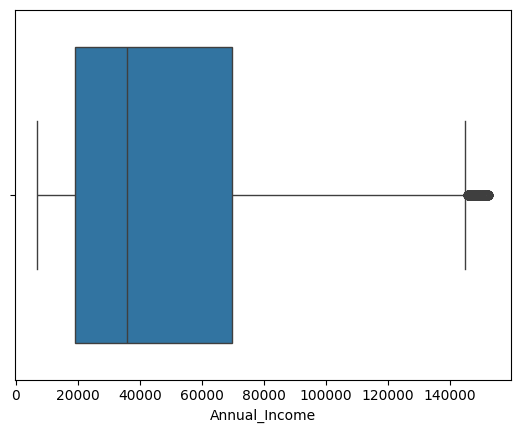

In [ ]:
sns.boxplot(x=df_cleaned['Annual_Income'])

<Axes: xlabel='Outstanding_Debt'>

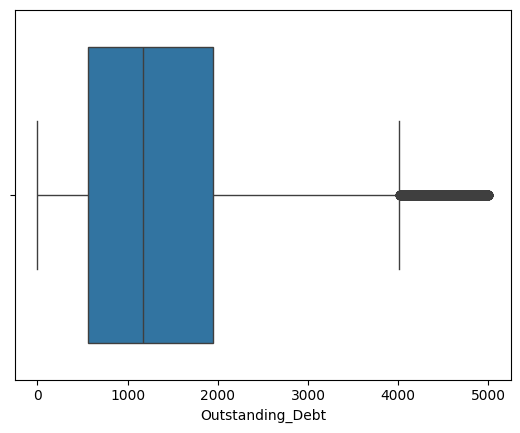

In [ ]:
sns.boxplot(x=df_cleaned['Outstanding_Debt'])

In [ ]:
occupation_count = df_cleaned['Occupation'].value_counts(dropna = False)
occupation_count

Occupation
Mechanic         2363
Teacher          2359
Scientist        2341
Lawyer           2338
Architect        2334
Entrepreneur     2298
Writer           2292
Engineer         2252
Doctor           2239
Journalist       2239
Developer        2213
Media_Manager    2210
Musician         2177
Manager          2176
Accountant       2106
Name: count, dtype: int64

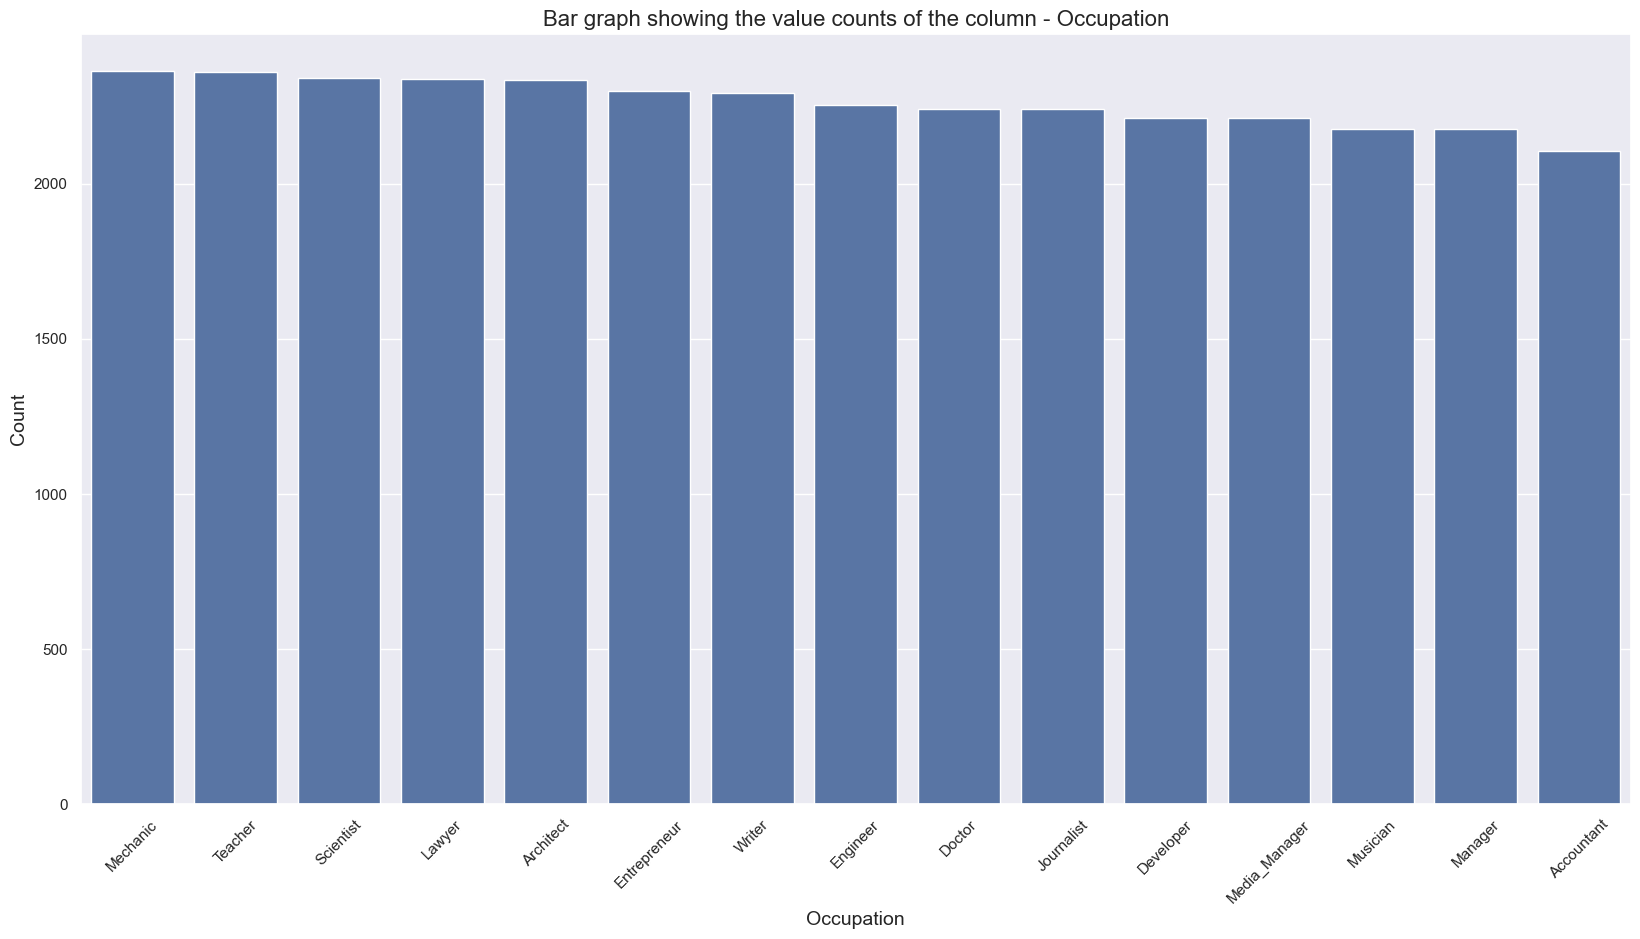

In [ ]:
sns.set(rc={'figure.figsize': (20, 10)})
sns.barplot(x=occupation_count.index, y=occupation_count.values)
plt.title('Bar graph showing the value counts of the column - Occupation', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Occupation', fontsize=14)
plt.xticks(rotation=45)
plt.show()

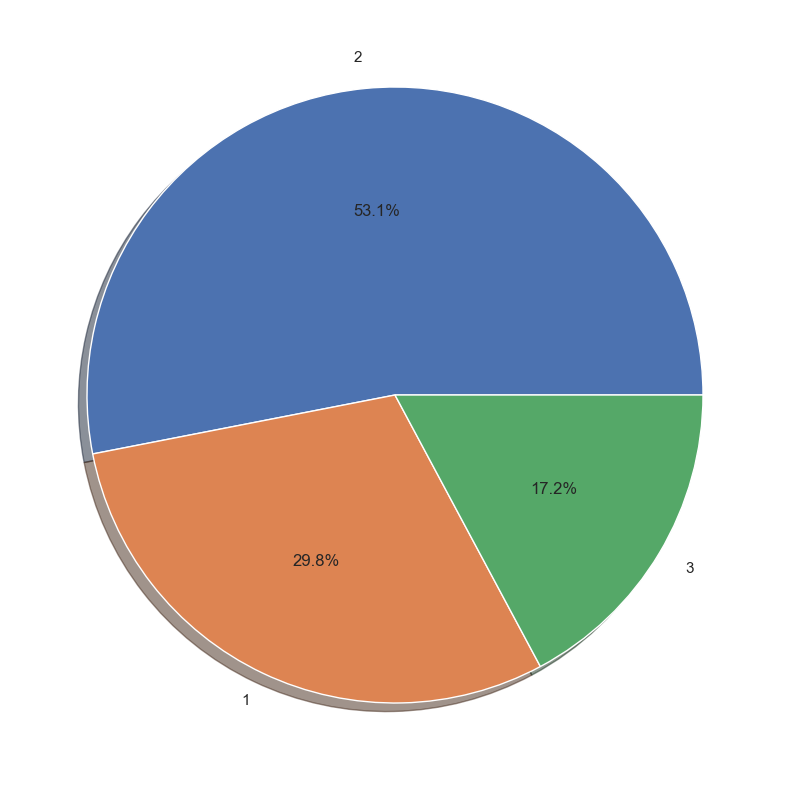

In [ ]:
label = df_cleaned.Credit_Score.value_counts().index
label_count = df_cleaned.Credit_Score.value_counts().values
plt.pie(data=df_cleaned, x=label_count, labels=label, autopct='%1.1f%%', shadow=True, radius=1)
plt.show()

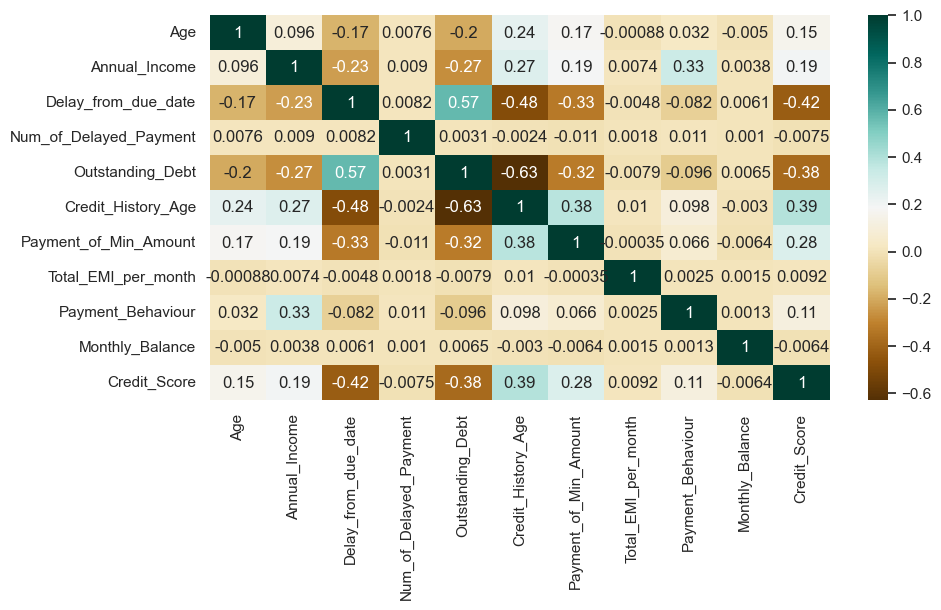

                             Age  Annual_Income  Delay_from_due_date  \
Age                     1.000000       0.095633            -0.174124   
Annual_Income           0.095633       1.000000            -0.230239   
Delay_from_due_date    -0.174124      -0.230239             1.000000   
Num_of_Delayed_Payment  0.007570       0.008966             0.008211   
Outstanding_Debt       -0.198137      -0.269094             0.570430   
Credit_History_Age      0.239645       0.272156            -0.484380   
Payment_of_Min_Amount   0.172988       0.186814            -0.329665   
Total_EMI_per_month    -0.000880       0.007359            -0.004823   
Payment_Behaviour       0.032079       0.327195            -0.081651   
Monthly_Balance        -0.005032       0.003796             0.006146   
Credit_Score            0.154511       0.194485            -0.424786   

                        Num_of_Delayed_Payment  Outstanding_Debt  \
Age                                   0.007570         -0.198137   

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation
df_numeric = df_cleaned.select_dtypes(include=[np.number])

# Calculate correlation matrix
c = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(10,5))
sns.heatmap(c, cmap="BrBG", annot=True)
plt.show()

# Display correlation matrix
print(c)


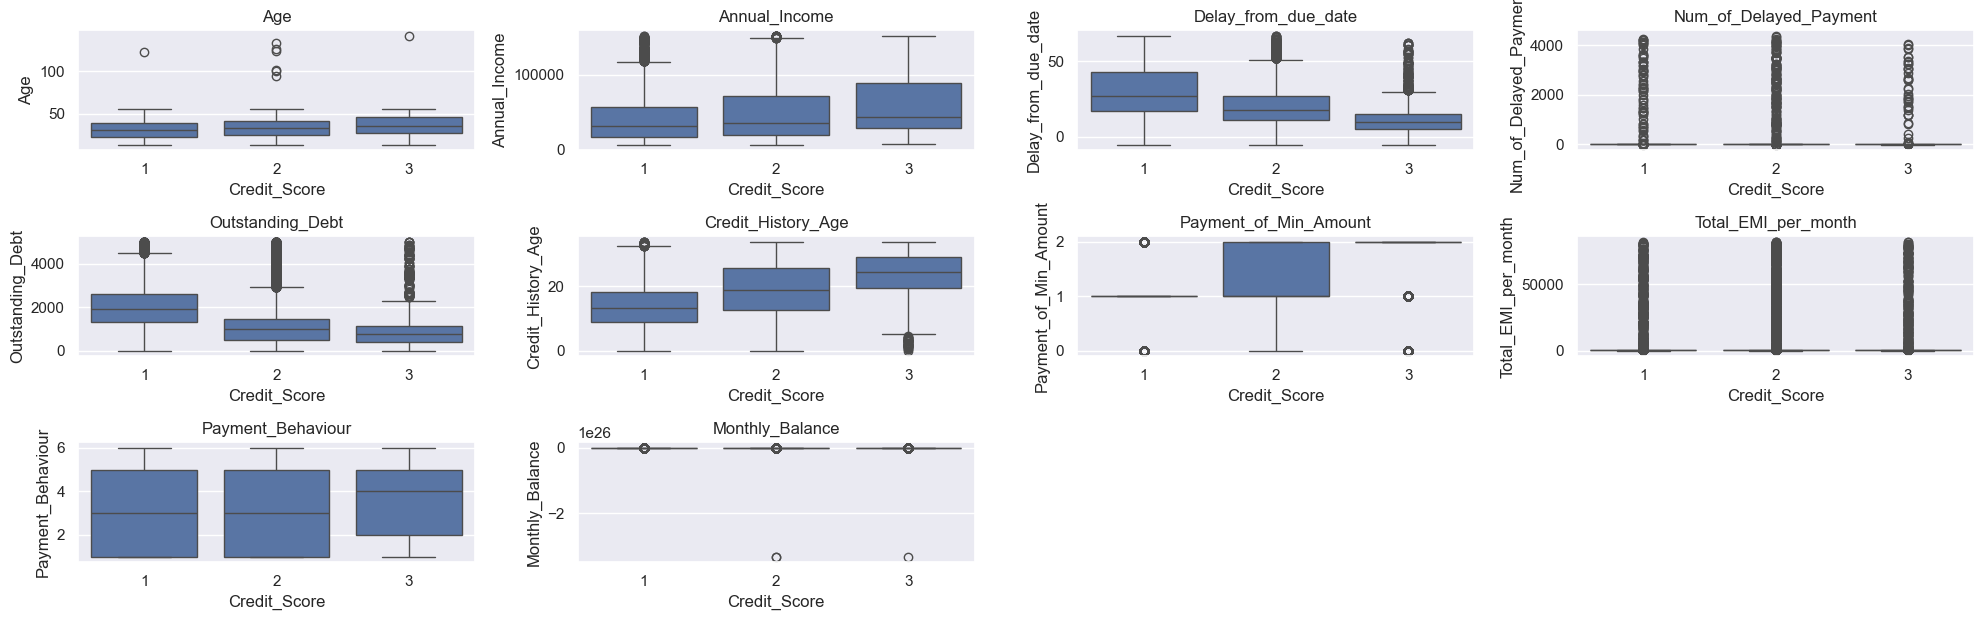

In [ ]:
for ax,col in enumerate(df_numeric.columns[:-1]):
    plt.subplot(5,4,ax+1)
    plt.title(col)
    sns.boxplot(x='Credit_Score', y=col, data=df_numeric)
    # plt.legend()
plt.tight_layout()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual_Income'}>,
        <Axes: title={'center': 'Delay_from_due_date'}>],
       [<Axes: title={'center': 'Num_of_Delayed_Payment'}>,
        <Axes: title={'center': 'Outstanding_Debt'}>,
        <Axes: title={'center': 'Credit_History_Age'}>],
       [<Axes: title={'center': 'Payment_of_Min_Amount'}>,
        <Axes: title={'center': 'Total_EMI_per_month'}>,
        <Axes: title={'center': 'Payment_Behaviour'}>],
       [<Axes: title={'center': 'Monthly_Balance'}>,
        <Axes: title={'center': 'Credit_Score'}>, <Axes: >]], dtype=object)

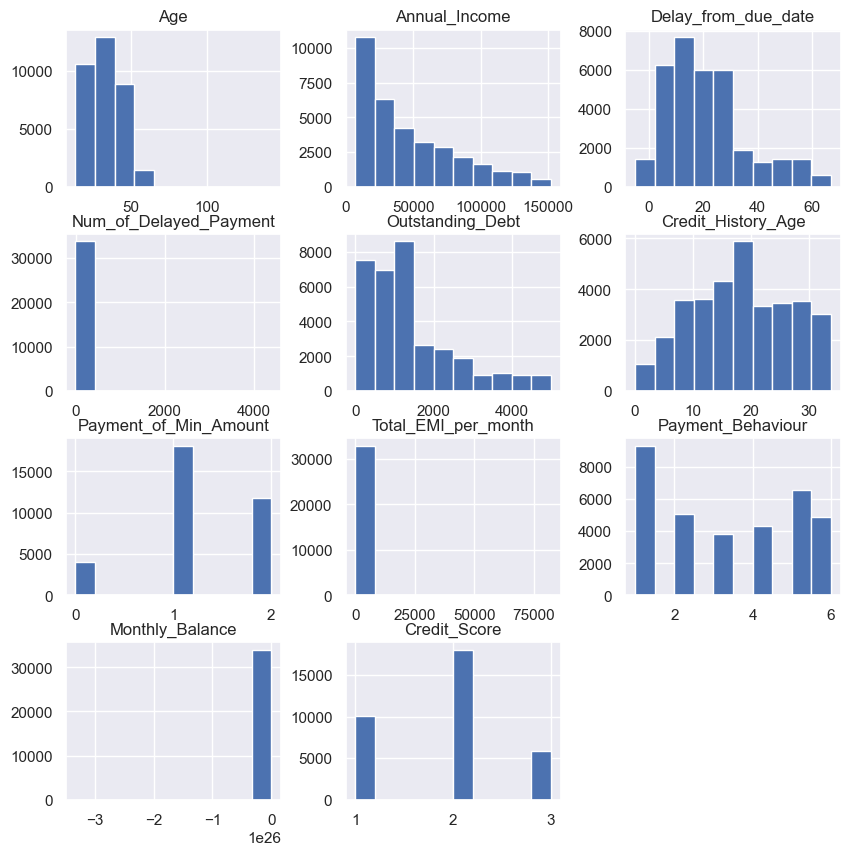

In [ ]:
df_cleaned.hist(figsize=(10, 10))


In [ ]:
df_cleaned.head()

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3.0,7.0,809.98,22.1,2,49.574949,4.0,312.494089,3
3,23,Scientist,19114.12,5.0,4.0,809.98,22.4,2,49.574949,1.0,223.451310,3
6,23,Scientist,19114.12,3.0,8.0,809.98,22.7,2,49.574949,1.0,244.565317,3
9,28,Teacher,34847.84,7.0,1.0,605.03,26.8,2,18.816215,6.0,484.591214,3
10,28,Teacher,34847.84,3.0,-1.0,605.03,26.9,2,18.816215,6.0,466.466476,2


In [ ]:
scaler = MinMaxScaler()
col_float = ['Age','Annual_Income','Delay_from_due_date','Num_of_Delayed_Payment',
             'Outstanding_Debt','Credit_History_Age','Total_EMI_per_month','Monthly_Balance']
for i in df_cleaned[col_float]:
  df_cleaned[i] = scaler.fit_transform(df_cleaned[[i]])
df_cleaned.head()

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0.070312,Scientist,0.083312,0.111111,0.002279,0.161968,0.652819,2,0.000603,4.0,1.0,3
3,0.070312,Scientist,0.083312,0.138889,0.001596,0.161968,0.661721,2,0.000603,1.0,1.0,3
6,0.070312,Scientist,0.083312,0.111111,0.002507,0.161968,0.670623,2,0.000603,1.0,1.0,3
9,0.109375,Teacher,0.191571,0.166667,0.000912,0.120958,0.792285,2,0.000229,6.0,1.0,3
10,0.109375,Teacher,0.191571,0.111111,0.000456,0.120958,0.795252,2,0.000229,6.0,1.0,2


In [ ]:
df_cleaned.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score'],
      dtype='object')

In [ ]:
df_cleaned = pd.get_dummies(df_cleaned, prefix='Occupation', columns=['Occupation'], drop_first=False)
df_cleaned.head()

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,...,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
0,0.070312,0.083312,0.111111,0.002279,0.161968,0.652819,2,0.000603,4.0,1.0,...,False,False,False,False,False,False,False,True,False,False
3,0.070312,0.083312,0.138889,0.001596,0.161968,0.661721,2,0.000603,1.0,1.0,...,False,False,False,False,False,False,False,True,False,False
6,0.070312,0.083312,0.111111,0.002507,0.161968,0.670623,2,0.000603,1.0,1.0,...,False,False,False,False,False,False,False,True,False,False
9,0.109375,0.191571,0.166667,0.000912,0.120958,0.792285,2,0.000229,6.0,1.0,...,False,False,False,False,False,False,False,False,True,False
10,0.109375,0.191571,0.111111,0.000456,0.120958,0.795252,2,0.000229,6.0,1.0,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
feed = df_cleaned[['Age', 'Annual_Income', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Occupation_Accountant', 'Occupation_Architect',
       'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer']]

In [ ]:
df_train_x = feed.drop('Credit_Score',axis = 1)
df_train_y = feed['Credit_Score']
x_train, x_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier

# Assuming 'feed' is your DataFrame and it's already been defined

# Splitting dataset into train and test
df_train_x = feed.drop('Credit_Score', axis=1)
df_train_y = feed['Credit_Score']
x_train, x_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.20, random_state=42)

# Training KNeighbors Classifier
kn = KNeighborsClassifier()
kn.fit(x_train, y_train)

# Predicting the test set results
kn_y_pred = kn.predict(x_test)

# Confusion Matrix
kn_cm = confusion_matrix(y_test, kn_y_pred)
print("Confusion Matrix:")
print(kn_cm)
print("  ")

# Accuracy
kn_accuracy = accuracy_score(y_test, kn_y_pred)
print("Accuracy:", kn_accuracy)

# Precision, Recall, and F1 Score
kn_precision = precision_score(y_test, kn_y_pred, average='macro')  # Use 'micro', 'macro', or 'weighted' based on your class distribution and problem needs
kn_recall = recall_score(y_test, kn_y_pred, average='macro')
kn_f1 = f1_score(y_test, kn_y_pred, average='macro')

print("Precision:", kn_precision)
print("Recall:", kn_recall)
print("F1 Score:", kn_f1)


Confusion Matrix:
[[1213  754   79]
 [ 704 2498  361]
 [ 143  617  419]]
  
Accuracy: 0.6084266352386565
Precision: 0.5740854350718929
Recall: 0.5497815428699989
F1 Score: 0.5580861034326624


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier

# Assuming 'feed' is your DataFrame and it's already been defined

# Define features and target
X = feed.drop('Credit_Score', axis=1)
y = feed['Credit_Score']

# Initialize KNeighbors Classifier
kn = KNeighborsClassifier()

# Define scoring methods you're interested in
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# Perform cross-validation
cv_results = cross_validate(kn, X, y, cv=5, scoring=scoring)

# Display results
print("Cross-validation results:")
for score in scoring:
    print(f"{score}: {cv_results['test_'+score].mean()} ± {cv_results['test_'+score].std()}")


Cross-validation results:
accuracy: 0.5626307755502282 ± 0.005277274329495184
precision_macro: 0.5178390467064145 ± 0.006970798419478863
recall_macro: 0.5021349830575466 ± 0.005357711512197793
f1_macro: 0.5072771888589445 ± 0.005845186562454469


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# Initialize the model
log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter if the model doesn't converge

# Fit the model
log_reg.fit(x_train, y_train)
# Predicting the Test set results
y_pred = log_reg.predict(x_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("  ")

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision, Recall, and F1 Score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Confusion Matrix:
[[ 805 1182   59]
 [ 487 2875  201]
 [  21  884  274]]
  
Accuracy: 0.5824985268120212
Precision: 0.569358134924104
Recall: 0.477585089596948
F1 Score: 0.49178943791157526


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

# Assuming x_train, x_test, y_train, and y_test are already defined as part of your dataset

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)  # Adjust max_iter as necessary

# Define scoring metrics
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# Perform 5-fold cross-validation
cv_results = cross_validate(log_reg, X, y, cv=5, scoring=scoring)

# Display results
print("Cross-validation results:")
for metric in scoring:
    print(f"{metric}: Mean = {cv_results['test_'+metric].mean()}, Standard Deviation = {cv_results['test_'+metric].std()}")


Cross-validation results:
accuracy: Mean = 0.5777472687524653, Standard Deviation = 0.007790170436948096
precision_macro: Mean = 0.5599026468999495, Standard Deviation = 0.011847646669655322
recall_macro: Mean = 0.4734434413176382, Standard Deviation = 0.011635950495032406
f1_macro: Mean = 0.4877431701688543, Standard Deviation = 0.013765055188555765


In [ ]:
import warnings
warnings.simplefilter('ignore', category=UserWarning)